# Focus stacking with image bunches

Example of focus stacking with vignetting correction.

Note that only a small number of frames has been uploaded, and the final image focus is not optimal. 

In [1]:
from shinestacker import *

In [2]:
job = StackJob("job", ".")
job.add_action(NoiseDetection(input_path=["input/img-vignetted"],
                              channel_thresholds=(10, 10, 10), plot_range=(7, 16)))
job.run()

[INF] noise-map: : output directory noise-map content erased                              
[INF] noise-map: map noisy pixels from frames in folder: input/img-vignetted                              


noise-map:   0%|          | 0/4 [00:00<?, ?it/s]

[INF] noise-map: hot pixels: rgb: 142, r: 39, g: 81, b: 56                              
[INF] noise-map: writing hot pixels map file: noise-map/hot_pixels.png                              
[INF] noise-map: elapsed time: 00:00:00.15s                              
[INF] noise-map: completed                              
[INF] job: elapsed time: 00:00:00.15s                              
[INF] job: completed                              


In [3]:
job = StackJob("job", ".", input_path="input/img-vignetted")
job.add_action(CombinedActions("align", [MaskNoise(), Vignetting(max_correction=0.9), AlignFrames(),
                                         BalanceFrames(channel=constants.BALANCE_RGB,
                                                       corr_map=constants.BALANCE_MATCH_HIST,
                                                       mask_size=0.8)],
                       output_path="output/img-ex1-align"))
job.add_action(FocusStack("stack", PyramidStack(), exif_path='', output_path="output/img-ex1-stack"))
job.run()

[INF] align: begin run                              
[INF] align: : 4 files in folder: input/img-vignetted                              
[INF] align: focus stacking                              
[INF] align:                                                                                                                     
[INF] align: elapsed time: 00:00:03.85s                              
[INF] align: completed                              
[INF] stack: : 4 files in folder: output/img-ex1-align                              
[INF] stack: focus stacking                              
[INF] stack: elapsed time: 00:00:00.80s                                                         
[INF] stack: completed                              
[INF] job: elapsed time: 00:00:04.66s                              
[INF] job: completed                              


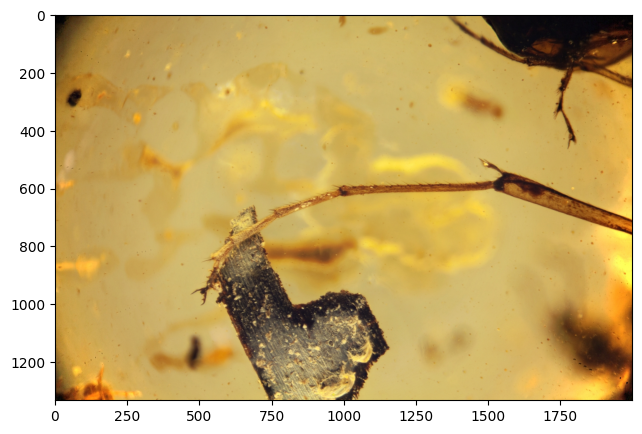

In [4]:
from shinestacker.algorithms.utils import img_8bit, read_img
import matplotlib.pyplot as plt
import cv2

img = cv2.cvtColor(read_img("output/img-ex1-stack/stack_vig-0000.jpg"), cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 5))
plt.imshow(img, 'gray')
plt.show()